In [29]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [28]:
df = pd.read_csv("./data/teams.csv")

df.columns

Index(['team', 'year', 'athletes', 'events', 'age', 'height', 'weight',
       'prev_medals', 'medals'],
      dtype='object')

<Axes: xlabel='athletes', ylabel='medals'>

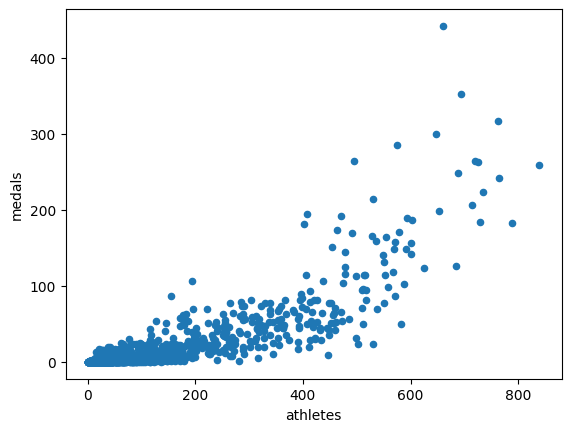

In [44]:
# plt.figure(figsize=(10, 6))
# plt.scatter(df['athletes'], df['medals'], color='blue', marker='o')
# plt.title('Number of Athletes vs. Medals')
# plt.xlabel('Number of Athletes')
# plt.ylabel('Number of Medals')
# plt.grid(True)
# plt.show()


df.plot.scatter("athletes", "medals")

In [7]:
X = df[["athletes", "prev_medals"]].copy()
Y = df[["medals"]].copy()

In [10]:
X["intercept"] = 1

In [11]:
X = X[["intercept", "athletes", "prev_medals"]]

In [12]:
X

,intercept,athletes,prev_medals
0,1,8,0.0
1,1,5,0.0
2,1,8,0.0
3,1,11,0.0
4,1,5,0.0
...,...,...,...
2009,1,26,0.0
2010,1,14,0.0
2011,1,16,3.0
2012,1,9,4.0


In [13]:
X_T = X.T

In [22]:
B = np.linalg.inv(X_T @ X) @X_T @ Y

In [23]:
B

,medals
0,-1.961889
1,0.071112
2,0.734137


In [25]:
B.index = X.columns

In [26]:
predictions = X @ B

In [27]:
predictions

,medals
0,-1.392992
1,-1.606329
2,-1.392992
3,-1.179656
4,-1.606329
...,...
2009,-0.112974
2010,-0.966319
2011,1.378315
2012,1.614667


In [37]:

from sklearn.linear_model import LinearRegression



model = LinearRegression()
model.fit(df[['athletes','prev_medals']], df['medals'])






LinearRegression()

In [38]:
model.intercept_

-1.9618893867034348

In [39]:
model.coef_

array([0.07111214, 0.73413679])